Follow this guide to select the correct conda environment\
https://stackoverflow.com/questions/66869413/visual-studio-code-does-not-detect-virtual-environments

In [1]:
import os
os.environ['NUMEXPR_MAX_THREADS'] = '128'

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
#print(sys.executable)
from importlib import reload

import collections
import os
import subprocess
import numpy as np

import confidence.confidence_tools as confidence_tools

from IPython import display
from collections import defaultdict
import py3Dmol
import pandas as pd
#pd.set_option('display.max_columns', None)

# import drawing library
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# CHANGE
id="8av2"
model=(4,2)
prediction=(29,2)
preset="default"



# CHANGE
id="7x8t"
model=(1,4)
prediction=(2,29)
preset="default"

In [4]:
# Software
MMalign_exe="/home/sfromm/programs/MMalign/MMalign"

# Directories
tmp = "/home/sfromm/tmp"
native_pdb = f"/home/sfromm/git/abag-benchmark-set/data/db/structures_filtered/{id}_filtered.pdb"
path_scores = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/scores.csv"

#f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}_merged.csv"


# Parameters
pdb1_cut = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}/{id}_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}_cut_query.pdb"
pdb2_cut = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}/{id}_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}_cut_query.pdb"
pdb1 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/unrelaxed_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}.pdb"
pdb2 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/unrelaxed_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}.pdb"
pkl1 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/result_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}.pkl"
pkl2 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/result_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}.pkl"


In [5]:

# # Directories
# tmp = "/home/sfromm/tmp"
# native_pdb = f"/home/sfromm/git/abag-benchmark-set/data/db/structures_filtered/{id}_filtered.pdb"
# path_scores = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}_merged.csv"

# # Parameters
# pdb1_cut = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}/{id}_model_{model[0]}_multimer_v3_pred_{prediction[0]}_{preset}_cut_query.pdb"
# pdb2_cut = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}/{id}_model_{model[1]}_multimer_v3_pred_{prediction[1]}_{preset}_cut_query.pdb"
# pdb1 = f"/home/sfromm/git/abag-benchmark-set/data/models/{preset}/{id}complex/model_seed_{prediction[0]}_sample_{model[0]}_{preset}.pdb"
# pdb2 = f"/home/sfromm/git/abag-benchmark-set/data/models/{preset}/{id}complex/model_seed_{prediction[1]}_sample_{model[1]}_{preset}.pdb"
# pkl1 = f"/home/sfromm/git/abag-benchmark-set/data/models/{preset}/{id}complex/full_confidences_seed_{prediction[0]}_sample_{model[0]}_{preset}.json"
# pkl2 = f"/home/sfromm/git/abag-benchmark-set/data/models/{preset}/{id}complex/full_confidences_seed_{prediction[1]}_sample_{model[1]}_{preset}.json"



# Model selection

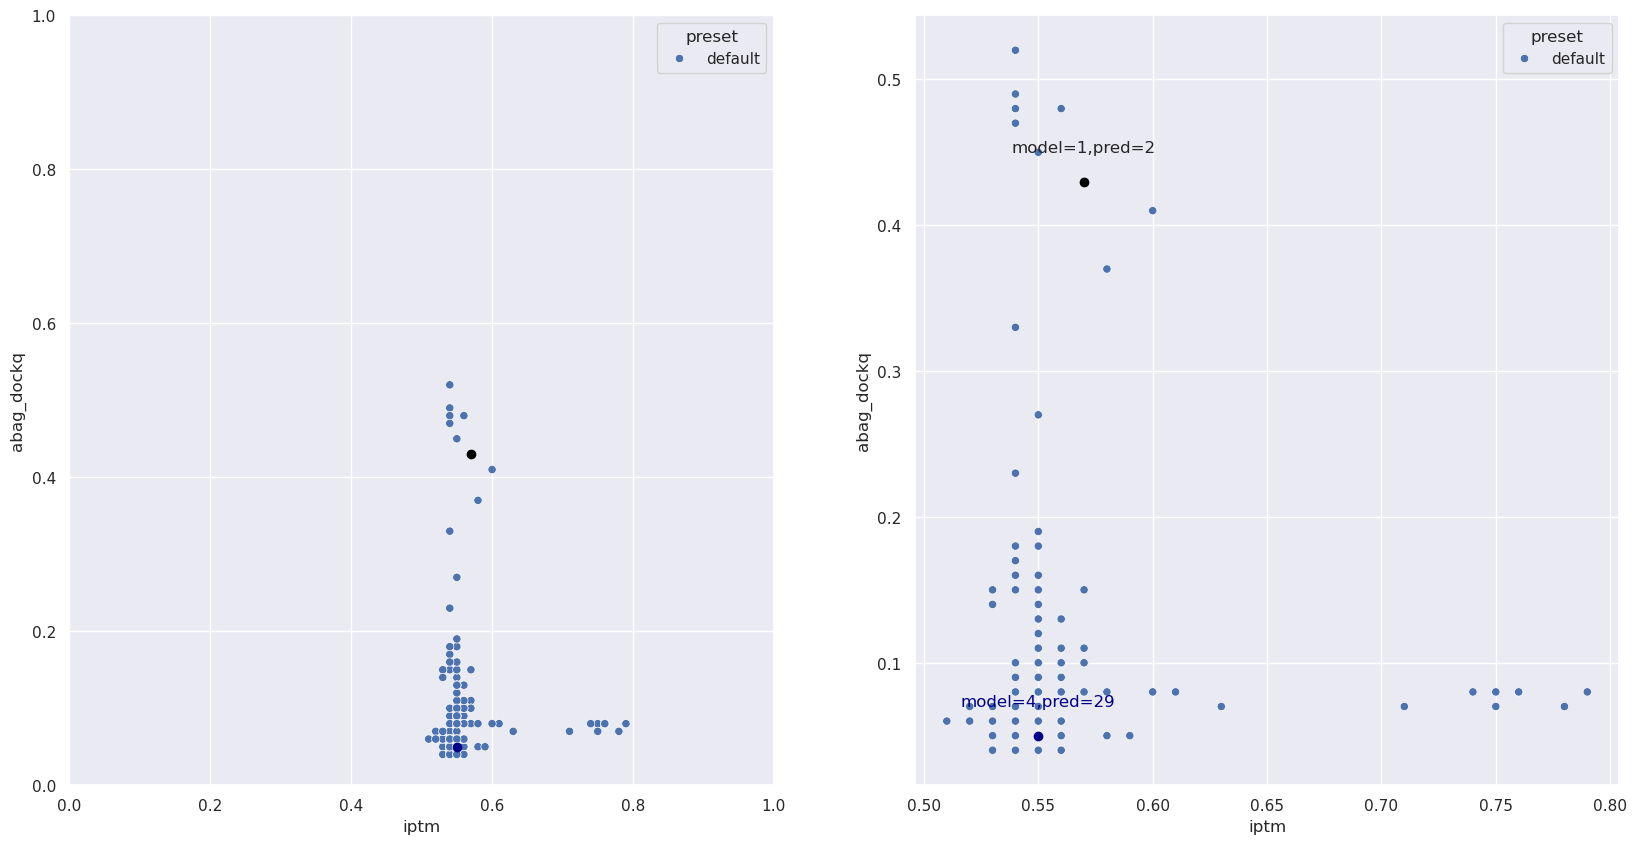

Selected model 1: 12
Selected model 2: 429


In [6]:
df_scores = pd.read_csv(path_scores, sep=',')

# Set style
sns.set_theme()

n_x_axis=2
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*10, 1*10))


x1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['iptm']
y1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['abag_dockq']
x2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['iptm']
y2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['abag_dockq']

# First axes
ax=axes[0]
ax.set_xlim((0,1))
ax.set_ylim((0,1))
sns.scatterplot(ax=ax, data=df_scores,x='iptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')

# Second axes
ax = axes[1]
sns.scatterplot(ax=ax, data=df_scores,x='iptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')
ax.text(x1, y1+0.02, f"model={model[0]},pred={prediction[0]}", ha='center')
ax.text(x2, y2+0.02, f"model={model[1]},pred={prediction[1]}", ha='center', color='darkblue')

plt.show()
plt.close()
print('\n'.join([f"Selected model {i+1}: {model[i]}{prediction[i]}" for i in [0,1]]))


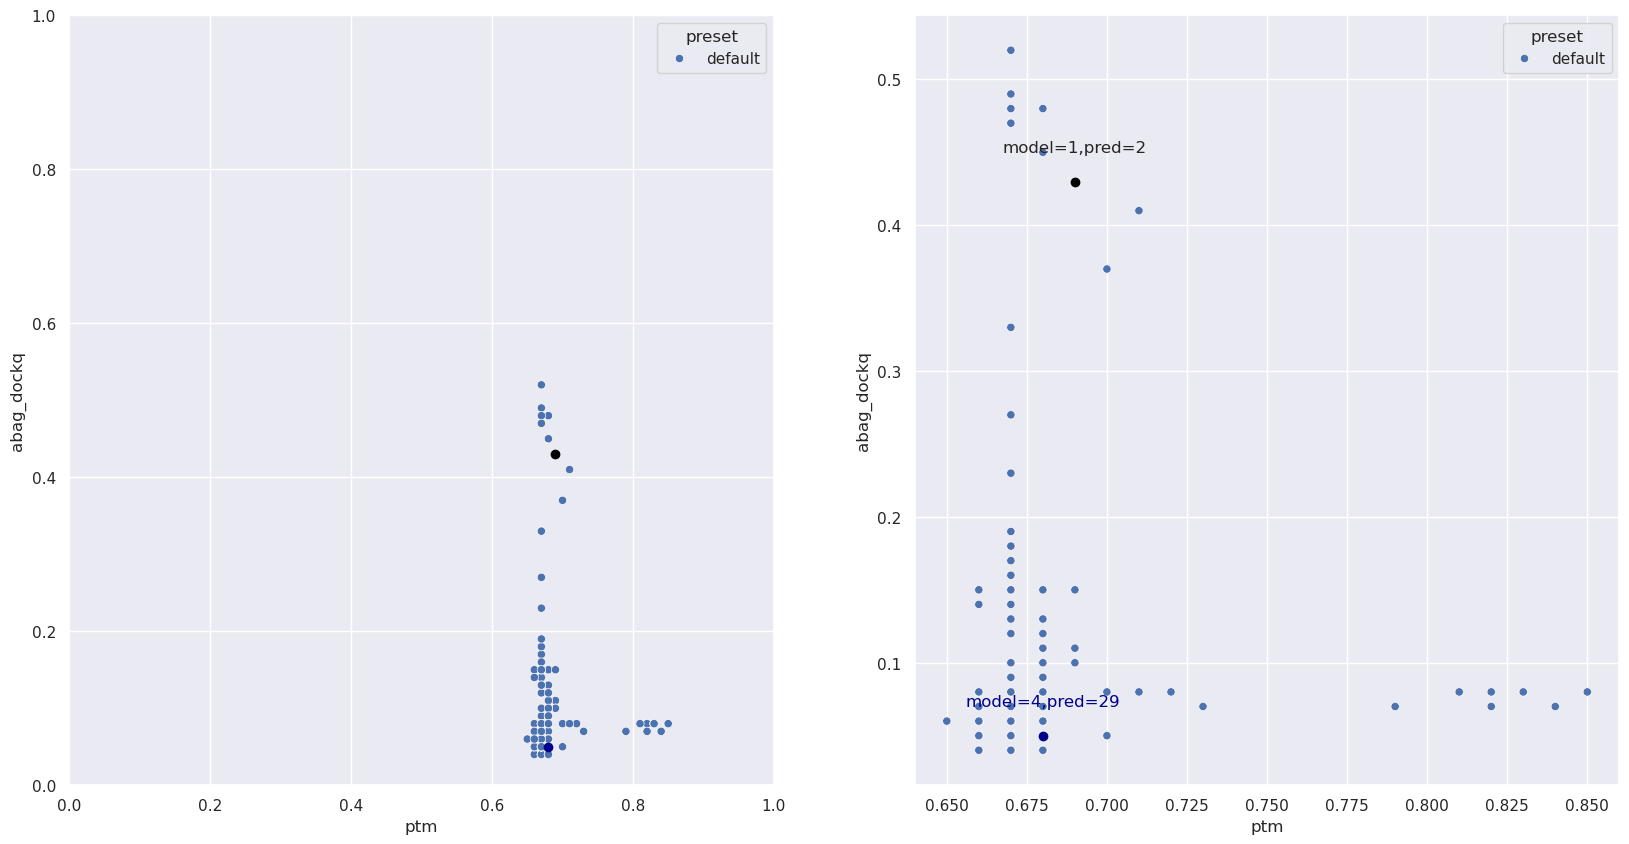

Selected model 1: 12
Selected model 2: 429


In [7]:
df_scores = pd.read_csv(path_scores, sep=',')

# Set style
sns.set_theme()

n_x_axis=2
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*10, 1*10))


x1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['ptm']
y1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['abag_dockq']
x2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['ptm']
y2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['abag_dockq']

# First axes
ax=axes[0]
ax.set_xlim((0,1))
ax.set_ylim((0,1))
sns.scatterplot(ax=ax, data=df_scores,x='ptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')

# Second axes
ax = axes[1]
sns.scatterplot(ax=ax, data=df_scores,x='ptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')
ax.text(x1, y1+0.02, f"model={model[0]},pred={prediction[0]}", ha='center')
ax.text(x2, y2+0.02, f"model={model[1]},pred={prediction[1]}", ha='center', color='darkblue')

plt.show()
plt.close()
print('\n'.join([f"Selected model {i+1}: {model[i]}{prediction[i]}" for i in [0,1]]))


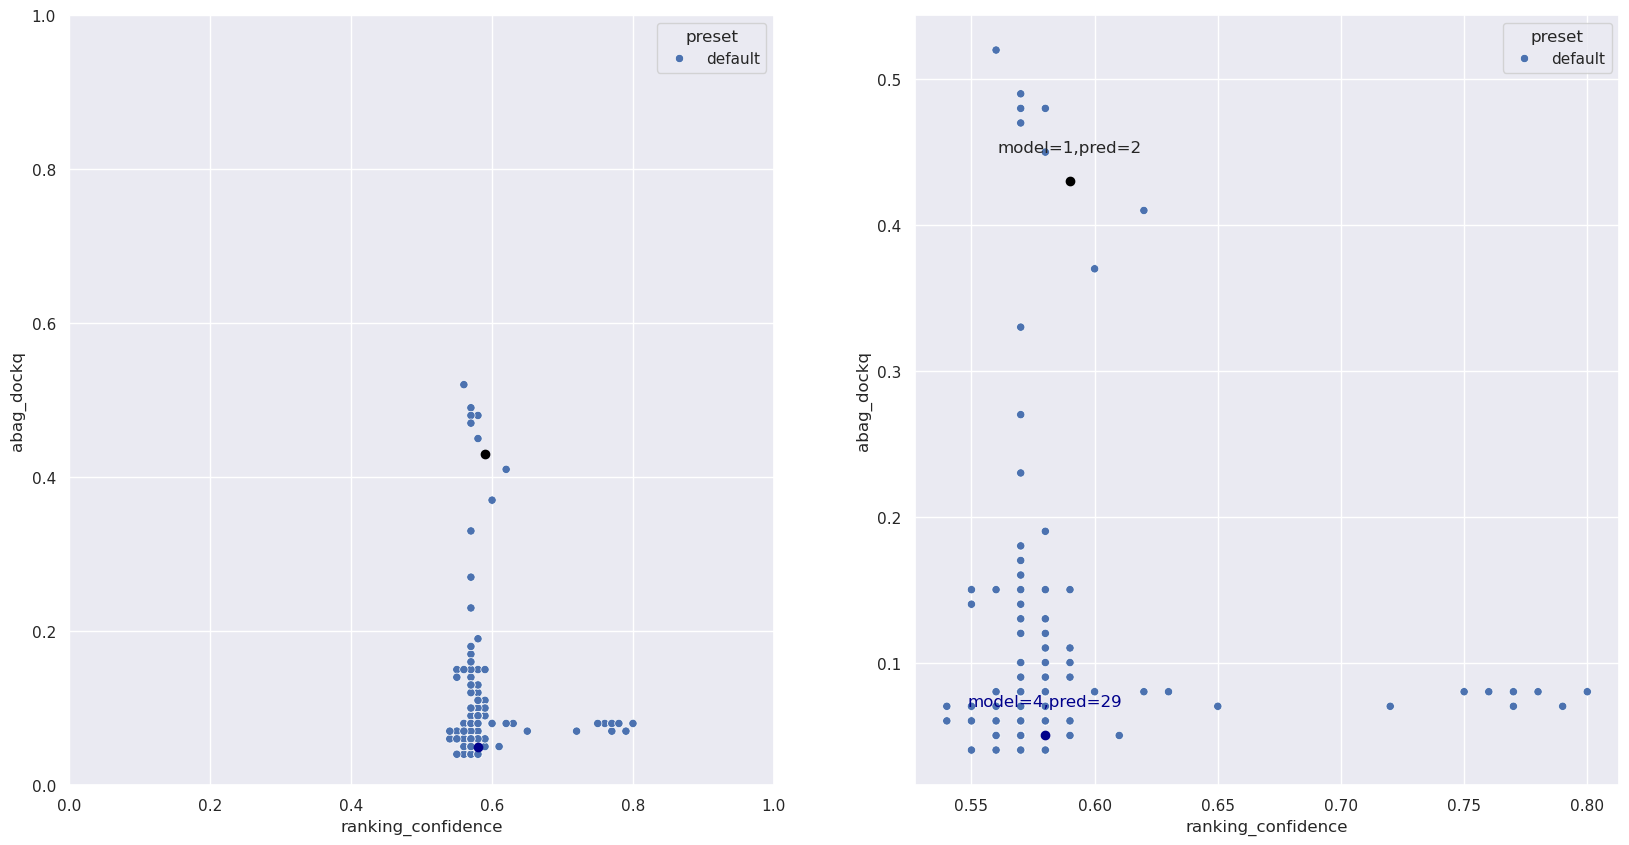

Selected model 1: 12
Selected model 2: 429


In [8]:
df_scores = pd.read_csv(path_scores, sep=',')

# Set style
sns.set_theme()

n_x_axis=2
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*10, 1*10))


x1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['ranking_confidence']
y1=df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ].iloc[0]['abag_dockq']
x2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['ranking_confidence']
y2=df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ].iloc[0]['abag_dockq']

# First axes
ax=axes[0]
ax.set_xlim((0,1))
ax.set_ylim((0,1))
sns.scatterplot(ax=ax, data=df_scores,x='ranking_confidence',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')

# Second axes
ax = axes[1]
sns.scatterplot(ax=ax, data=df_scores,x='ranking_confidence',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')
ax.text(x1, y1+0.02, f"model={model[0]},pred={prediction[0]}", ha='center')
ax.text(x2, y2+0.02, f"model={model[1]},pred={prediction[1]}", ha='center', color='darkblue')

plt.show()
plt.close()
print('\n'.join([f"Selected model {i+1}: {model[i]}{prediction[i]}" for i in [0,1]]))


# Calculating scores

In [9]:
# Some helper functions
def get_chains(pdb):
    return [chain.id for chain in confidence_tools.load_pdb_structure(pdb).get_chains()]

def get_name(pdb):
    return os.path.split(pdb)[1].split('.')[0]

# Align target structures to template structure

def MMalign_wrapper(MMalign_exe, target_pdb, template_pdb, aligned_pdb=None):
    if aligned_pdb is None:
        raw_cmd = [MMalign_exe, target_pdb, template_pdb, "-outfmt 2"]
    else:
        raw_cmd = [MMalign_exe, target_pdb, template_pdb, "-outfmt 2", "-o", aligned_pdb]
    cmd = " ".join(raw_cmd)
    result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE, text=True).stdout
    keys = result.split("\n")[0][1:].split("\t")
    values = result.split("\n")[1].split("\t")
    result = {}
    result["target"] =  os.path.split(target_pdb)[1].split('.')[0]
    result["template"] =  os.path.split(template_pdb)[1].split('.')[0]
    result.update({keys[i] : values[i] for i in range(len(keys))})
    result["PDBchain1"] = result["PDBchain1"].split(":",1)[1]
    result["PDBchain2"] = result["PDBchain2"].split(":",1)[1]
    return result

aligned_pdb1_cut_to_native = os.path.join(tmp,"aligned_pdb1_cut_to_native.pdb")
aligned_pdb2_cut_to_native = os.path.join(tmp,"aligned_pdb2_cut_to_native.pdb")
aligned_pdb1_cut_to_pdb2_cut = os.path.join(tmp,"aligned_pdb1_cut_to_pdb2_cut.pdb")

MMalign_pdb1_cut_to_native = MMalign_wrapper(MMalign_exe,pdb1_cut,native_pdb,aligned_pdb1_cut_to_native)
MMalign_pdb2_cut_to_native = MMalign_wrapper(MMalign_exe,pdb2_cut,native_pdb,aligned_pdb2_cut_to_native)
MMalign_pdb1_cut_to_pdb2_cut = MMalign_wrapper(MMalign_exe,pdb1_cut,pdb2_cut,aligned_pdb1_cut_to_pdb2_cut)

aligned_pdb1_to_native = os.path.join(tmp,"aligned_pdb1_to_native.pdb")
aligned_pdb2_to_native = os.path.join(tmp,"aligned_pdb2_to_native.pdb")
aligned_pdb1_to_pdb2 = os.path.join(tmp,"aligned_pdb1_to_pdb2.pdb")

MMalign_pdb1_to_native = MMalign_wrapper(MMalign_exe,pdb1,native_pdb,aligned_pdb1_to_native)
MMalign_pdb2_to_native = MMalign_wrapper(MMalign_exe,pdb2,native_pdb,aligned_pdb2_to_native)
MMalign_pdb1_to_pdb2 = MMalign_wrapper(MMalign_exe,pdb1,pdb2,aligned_pdb1_to_pdb2)

In [10]:
# Print MMalign scores

df_MMalign_output = defaultdict(list)
for d in [MMalign_pdb1_to_native,MMalign_pdb2_to_native,MMalign_pdb1_to_pdb2]:
    for key, value in d.items(): 
        df_MMalign_output[key].append(value)
df_MMalign_output = pd.DataFrame.from_dict(df_MMalign_output)
df_MMalign_output

target  \
0   unrelaxed_model_1_multimer_v3_pred_2_default   
1  unrelaxed_model_4_multimer_v3_pred_29_default   
2   unrelaxed_model_1_multimer_v3_pred_2_default   

                                        template PDBchain1 PDBchain2     TM1  \
0                                  7x8t_filtered     B:C:D     A:C:B  0.8526   
1                                  7x8t_filtered     B:C:D     A:C:B  0.6875   
2  unrelaxed_model_4_multimer_v3_pred_29_default     B:C:D     B:C:D  0.7113   

      TM2  RMSD    ID1    ID2  IDali   L1   L2 Lali  
0  0.5820  2.81  0.934  0.616  0.960  361  547  351  
1  0.4634  3.58  0.657  0.433  0.846  361  547  280  
2  0.7113  3.52  0.665  0.665  0.842  361  361  285

In [11]:
df_MMalign_output_cut = defaultdict(list)
for d in [MMalign_pdb1_cut_to_native,MMalign_pdb2_cut_to_native,MMalign_pdb1_cut_to_pdb2_cut]:
    for key, value in d.items(): 
        df_MMalign_output_cut[key].append(value)
df_MMalign_output_cut = pd.DataFrame.from_dict(df_MMalign_output_cut)
df_MMalign_output_cut

target  \
0  7x8t_model_1_multimer_v3_pred_2_default_cut_query   
1  7x8t_model_4_multimer_v3_pred_29_default_cut_q...   
2  7x8t_model_1_multimer_v3_pred_2_default_cut_query   

                                            template PDBchain1 PDBchain2  \
0                                      7x8t_filtered     A:B:C     A:B:C   
1                                      7x8t_filtered     A:B:C     A:B:C   
2  7x8t_model_4_multimer_v3_pred_29_default_cut_q...     A:B:C     A:B:C   

      TM1     TM2  RMSD    ID1    ID2  IDali   L1   L2 Lali  
0  0.8733  0.5817  2.80  0.997  0.640  0.997  351  547  351  
1  0.7001  0.4586  3.32  0.672  0.431  0.861  351  547  274  
2  0.7212  0.7212  2.69  0.678  0.678  0.878  351  351  271

In [12]:
# Print dataframe scores
#print(df_scores[(df_scores['model']==f"model_{model[0]}_multimer_v3") & (df_scores['prediction']==prediction[0]) ])
#print(df_scores[(df_scores['model']==f"model_{model[1]}_multimer_v3") & (df_scores['prediction']==prediction[1]) ])



# Protein visualization

In [13]:
color_list = ['#33ff33', '#00ffff', '#ff33cc', '#ffff00', '#ff9999', '#e5e5e5', '#7f7fff', '#ff7f00', '#7fff7f', '#199999', '#ff007f', '#ffdd5e', '#8c3f99', '#b2b2b2', '#007fff', '#c4b200', '#8cb266', '#00bfbf', '#b27f7f', '#fcd1a5', '#ff7f7f', '#ffbfdd', '#7fffff', '#ffff7f', '#00ff7f', '#337fcc', '#d8337f', '#bfff3f', '#ff7fff', '#d8d8ff', '#3fffbf', '#b78c4c', '#339933', '#66b2b2', '#ba8c84', '#84bf00', '#b24c66', '#7f7f7f', '#3f3fa5', '#a5512b']
#alphabet_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
color_list = ['yellow','blue','red','orange','purple','cyan','green','brown','aquamarine','darkblue','lightblue','magenta','pink']

# label options for atom
# atom.atom, atom.chain (chain), atom.resi (residue number), atom.elem (element symbol), atom.resn (name of residue), atom.model (the model the atom belongs to), atom.x, atom.y, atom.z (coordinates)
hover_func = '''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.model+":"+atom.chain+":"+atom.resi,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}'''
unhover_func = '''function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }'''

def plot_single_structure(view,pdb,pos):
    #color_list = ['#33ff33', '#00ffff', '#ff33cc', '#ffff00', '#ff9999', '#e5e5e5', '#7f7fff', '#ff7f00', '#7fff7f', '#199999', '#ff007f', '#ffdd5e', '#8c3f99', '#b2b2b2', '#007fff', '#c4b200', '#8cb266', '#00bfbf', '#b27f7f', '#fcd1a5', '#ff7f7f', '#ffbfdd', '#7fffff', '#ffff7f', '#00ff7f', '#337fcc', '#d8337f', '#bfff3f', '#ff7fff', '#d8d8ff', '#3fffbf', '#b78c4c', '#339933', '#66b2b2', '#ba8c84', '#84bf00', '#b24c66', '#7f7f7f', '#3f3fa5', '#a5512b']
    # Plot native structure
    view.addModel(open(pdb, 'r').read(),'pdb',viewer=pos)
    chains = get_chains(pdb)
    for i,chain in enumerate(chains):
       view.setStyle({'chain':chain},{'cartoon': {'color':color_list[i]}},viewer=pos)
    return f"Position {pos}:\n\tmodel 0: {get_name(pdb)} ({','.join(repr(item) for item in chains)}) ({','.join(color_list[i] for i,chain in enumerate(chains))})\n"

def plot_multi_structure(view,pdb_lst,pos):
    legend = f"Position {pos}:\n"
    for i, pdb in enumerate(pdb_lst):
        chains = get_chains(pdb)
        view.addModel(open(pdb, 'r').read(),'pdb',viewer=pos)
        view.setStyle({'model':i}, {'cartoon': {'color':color_list[i]}},viewer=pos)
        legend+= f"\tmodel {i}: {get_name(pdb)} ({','.join(repr(item) for item in chains)}) ({color_list[i]})\n"
    return legend

# Plot aligned structures
view = py3Dmol.view(width=3*400,height=600,viewergrid=(2,3),linked=False)
view.removeAllModels()
view.setBackgroundColor('0x17202a')
legend = plot_single_structure(view,native_pdb,(0,0))
legend +=plot_multi_structure(view,[aligned_pdb1_to_native,aligned_pdb2_to_native,native_pdb],(0,1))
legend +=plot_multi_structure(view,[aligned_pdb1_to_pdb2,pdb2],(0,2))
legend +=plot_multi_structure(view,[pdb1_cut,pdb1],(1,0))
legend +=plot_multi_structure(view,[aligned_pdb1_cut_to_native,aligned_pdb2_cut_to_native,native_pdb],(1,1))
legend +=plot_multi_structure(view,[aligned_pdb1_cut_to_pdb2_cut,pdb2_cut],(1,2))
view.setHoverable({},True,hover_func,unhover_func)
view.zoomTo()
print(legend)
view.render()

Position (0, 0):
	model 0: 7x8t_filtered ('A','B','C') (yellow,blue,red)
Position (0, 1):
	model 0: aligned_pdb1_to_native ('B','C','D') (yellow)
	model 1: aligned_pdb2_to_native ('B','C','D') (blue)
	model 2: 7x8t_filtered ('A','B','C') (red)
Position (0, 2):
	model 0: aligned_pdb1_to_pdb2 ('B','C','D') (yellow)
	model 1: unrelaxed_model_4_multimer_v3_pred_29_default ('B','C','D') (blue)
Position (1, 0):
	model 0: 7x8t_model_1_multimer_v3_pred_2_default_cut_query ('A','B','C') (yellow)
	model 1: unrelaxed_model_1_multimer_v3_pred_2_default ('B','C','D') (blue)
Position (1, 1):
	model 0: aligned_pdb1_cut_to_native ('A','B','C') (yellow)
	model 1: aligned_pdb2_cut_to_native ('A','B','C') (blue)
	model 2: 7x8t_filtered ('A','B','C') (red)
Position (1, 2):
	model 0: aligned_pdb1_cut_to_pdb2_cut ('A','B','C') (yellow)
	model 1: 7x8t_model_4_multimer_v3_pred_29_default_cut_query ('A','B','C') (blue)



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Predicted TM terms

In [14]:
pkl1_data = confidence_tools.load_data_from_pkl(pkl1)
pkl2_data = confidence_tools.load_data_from_pkl(pkl2)

pdb1_structure = confidence_tools.load_pdb_structure(pdb1)
pdb2_structure = confidence_tools.load_pdb_structure(pdb2)

asym_id_1  = confidence_tools.compute_asym_id_from_pdb(pdb1_structure)
asym_id_2  = confidence_tools.compute_asym_id_from_pdb(pdb2_structure)

num_res=asym_id_1.shape[0]

aligned_confidence_probs_1=pkl1_data['aligned_confidence_probs']
aligned_confidence_probs_2=pkl2_data['aligned_confidence_probs']

predicted_tm_terms_1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1, return_predicted_tm_term=True
        )
predicted_tm_terms_2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2, return_predicted_tm_term=True
        )

per_alignment_1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1, return_per_alignment=True
        )
per_alignment_2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2, return_per_alignment=True
        )

predicted_iptm_terms_1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1, return_predicted_tm_term=True,interface=True,asym_id=asym_id_1
        )
predicted_iptm_terms_2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2, return_predicted_tm_term=True,interface=True,asym_id=asym_id_2
        )

per_alignment_iptm_1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1, return_per_alignment=True, interface=True,asym_id=asym_id_1
        )
per_alignment_iptm_2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2, return_per_alignment=True,interface=True,asym_id=asym_id_2
        )

pae1=pkl1_data['predicted_aligned_error']
pae2=pkl2_data['predicted_aligned_error']

plddt_1=pkl1_data['plddt']
plddt_2=pkl2_data['plddt']


In [15]:
print(pae1.mean())
print(pae2.mean())

11.8877125
12.725502


In [16]:
# my jupyter notebook keeps crashing, maybe because of too large a variable? no idea
try:
    del pkl1_data
except:
    pass
try:
    del pkl2_data
except:
    pass


In [17]:
import matplotlib.colors as mcolors

# Some functions for drawing
plt.style.use('default')
def plot_matrix(
    mat1, mat2, filepath=None, limits1=None, limits2=None, name1="mat1", name2="mat2", title=None, figsize=7,
):

    color_map = "seismic" #"viridis"

    plot_objects = [mat1, mat2]
    limits = [limits1,limits2]
    titles = [name1,name2]
    if mat1.shape == mat2.shape:
        plot_objects.append(mat1-mat2)
        titles.append(f"{name1} - {name2}")
        if limits1==limits2:
            limits.append(limits1)
        else:
            limits.append(None)

    n_x_axis = len(plot_objects)
    fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * figsize, 1 * figsize))
    for i in range(n_x_axis):

        mat = plot_objects[i]
        # Compute color normalization centered at zero
        vmin, vmax = np.min(mat), np.max(mat)
        if vmin < 0 and vmax > 0:
            norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
            p = axes[i].imshow(mat, cmap=color_map, norm=norm)
        else:
            p = axes[i].imshow(plot_objects[i], cmap=color_map)
        plt.colorbar(p, ax=axes[i], fraction=0.046, pad=0.05)
        if limits[i] is not None:
            for limit in limits[i]:
                # horizontal line
                axes[i].plot([0,plot_objects[i].shape[0]-1], [limit,limit], color="red", linewidth=2) 
                # vertical line
                axes[i].plot([limit,limit], [0,plot_objects[i].shape[1]-1], color="red", linewidth=2) 
        axes[i].title.set_text(titles[i])

    if title is not None:
        fig.suptitle(title, fontsize=30)

    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()
    plt.close()
    return


def plot_vec(
    vec1, vec2,filepath=None,  limits=None, name1="vec1", name2="vec2",title=None,
):
    l = vec1.shape[0]
    assert l == vec2.shape[0]
    X = np.arange(l)

    # Figure Size

    n_x_axis = 2
    fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 1 * 7))

    # vec1 and vec2
    i=0
    axes[i].bar(X + 0.00, vec1, color="blue", alpha=1, width=1)
    axes[i].bar(X + 0.00, vec2, color="green", alpha = 0.5, width=1)
    axes[i].legend(labels=[name1,name2])
    #axes[i].set_ylim((0,1))

    # difference
    i=1
    axes[i].bar(X + 0.00, vec1-vec2, color="blue", width=1)
    axes[i].legend(labels=[f"{name1}-{name2}"])


    for i in [0,1]:
        if limits is not None:
            for limit in limits:

                ax00 = axes[i].twinx()
                # Plot a line
                ax00.axvline(x=limit, color="r")

                ax00.annotate(
                    f"{limit}",
                    xy=(limit, 0),
                    xytext=(limit, -0.1),
                    arrowprops=dict(facecolor="black", shrink=0.05),
                )


    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()
    plt.close()
    return

def get_chain_limits(asym_id):
    chain_limits = []
    chain_ids = asym_id.astype("int")
    for i in range(chain_ids[-1]):
        #chain_starts = np.where(chain_ids == i + 1)[0][0] + 1
        chain_stops = np.where(chain_ids == i + 1)[0][-1] + 1
        chain_limits.append(chain_stops - 1)
    chain_limits.pop()
    if chain_limits == []:
        return None
    return chain_limits

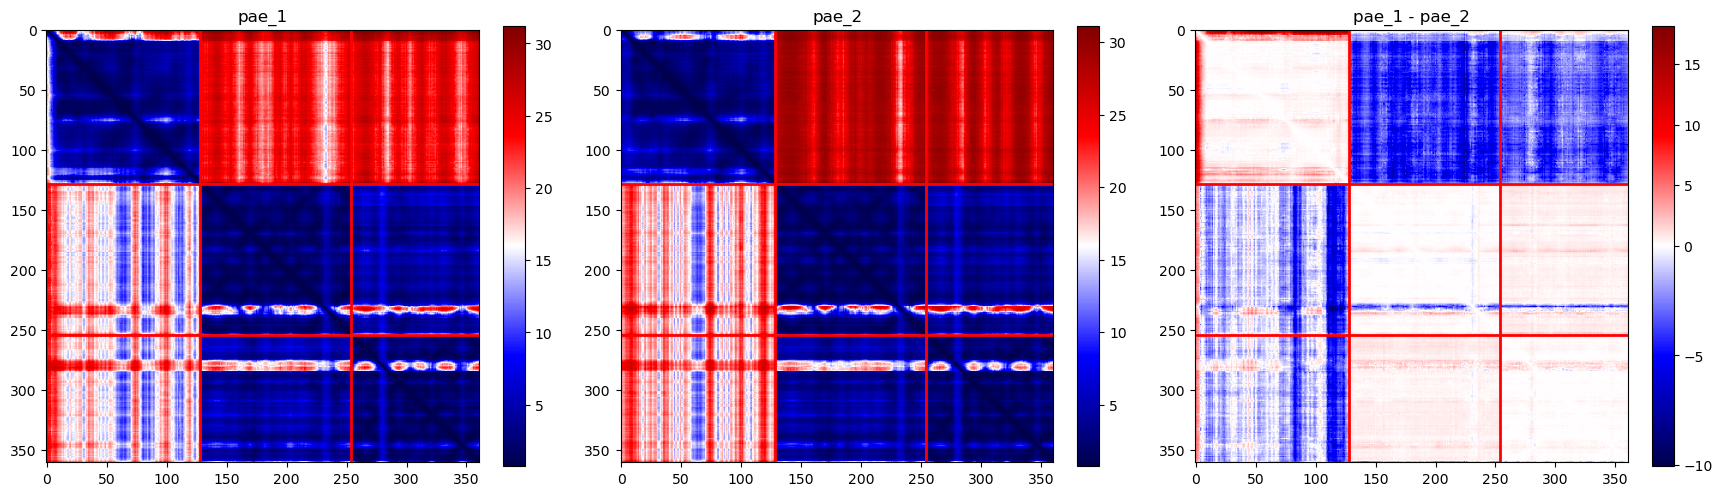

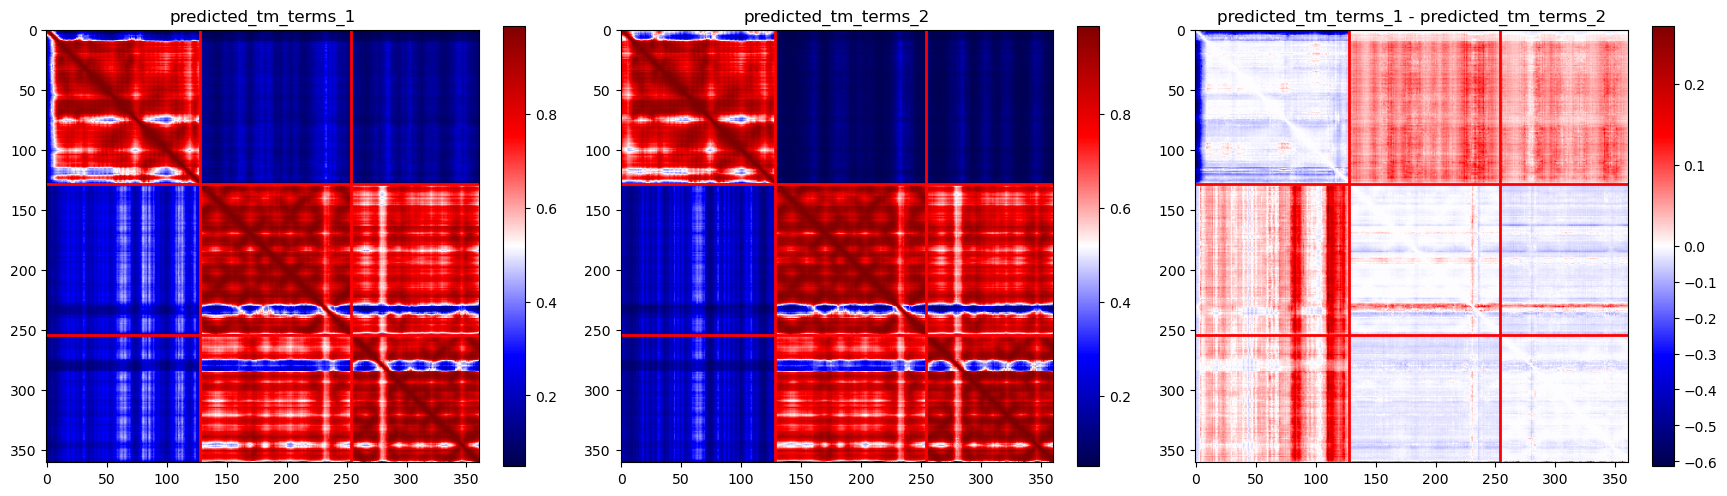

In [18]:

plot_matrix(
    mat1=pae1,
    mat2=pae2,
    name1='pae_1',
    name2='pae_2',
    limits1=get_chain_limits(asym_id_1),
    limits2=get_chain_limits(asym_id_2),
    #title="Predicted Aligned Error"
)

plot_matrix(
    mat1=predicted_tm_terms_1,
    mat2=predicted_tm_terms_2,
    name1='predicted_tm_terms_1',
    name2='predicted_tm_terms_2',
    limits1=get_chain_limits(asym_id_1),
    limits2=get_chain_limits(asym_id_2),
    #title="Predicted TM Terms"
)

In [19]:
def plot_matrix_multi(
    mat1_lst, mat2_lst, filepath=None, limits1=None, limits2=None, name1="mat1", name2="mat2", title=None, figsize=7,
):
    

    color_map = "viridis"
    assert len(mat1_lst) == len(mat2_lst)

    n_y_axis = len(mat1_lst)
    if n_y_axis < 2:
        return # TODO
    n_x_axis = 3
    fig, axes = plt.subplots(nrows=n_y_axis, ncols=n_x_axis, figsize=(n_x_axis * figsize, n_y_axis * figsize))

    for y_ax in range(n_y_axis):
        mat1 = mat1_lst[y_ax]
        mat2 = mat2_lst[y_ax]


        plot_objects = [mat1, mat2]
        limits = [limits1,limits2]
        titles = [name1,name2]
        assert mat1.shape == mat2.shape
        plot_objects.append(mat1-mat2)
        titles.append(f"{name1} - {name2}")
        if limits1==limits2:
            limits.append(limits1)
        else:
            limits.append(None)


        for i in range(n_x_axis):
            p = axes[y_ax,i].imshow(plot_objects[i], cmap=color_map)
            plt.colorbar(p, ax=axes[y_ax,i], fraction=0.046, pad=0.05)
            if limits[i] is not None:
                for limit in limits[i]:
                    # horizontal line
                    axes[y_ax,i].plot([0,plot_objects[i].shape[0]-1], [limit,limit], color="red", linewidth=2) 
                    # vertical line
                    axes[y_ax,i].plot([limit,limit], [0,plot_objects[i].shape[1]-1], color="red", linewidth=2) 
            axes[y_ax,i].title.set_text(titles[i])

    if title is not None:
        fig.suptitle(title, fontsize=30)

    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()
    plt.close()
    return


num_bins=64
bins = range(64)
bins = bins[:] # sections with too much output (plots) seem to crash the notebook
mat1_lst = [aligned_confidence_probs_1[:,:,bin] for bin in bins]
mat2_lst = [aligned_confidence_probs_2[:,:,bin] for bin in bins]

if False:
    plot_matrix_multi(
        mat1_lst=mat1_lst,
        mat2_lst=mat2_lst,
        name1=f'acprobs_1',
        name2=f'acprobs_2',
        limits1=get_chain_limits(asym_id_1),
        limits2=get_chain_limits(asym_id_2),
        #title="Predicted TM Terms"
        figsize=4.5,
    )


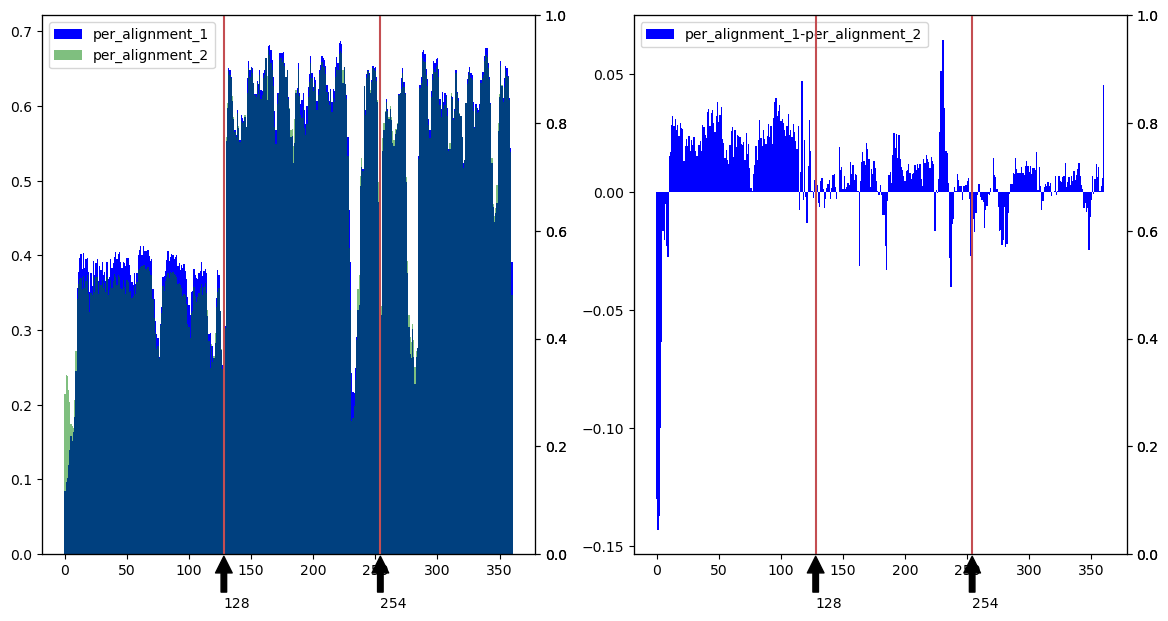

In [20]:


plot_vec(
    vec1=per_alignment_1,
    vec2=per_alignment_2,
    limits=get_chain_limits(asym_id_1),
    name1="per_alignment_1",
    name2="per_alignment_2"
)


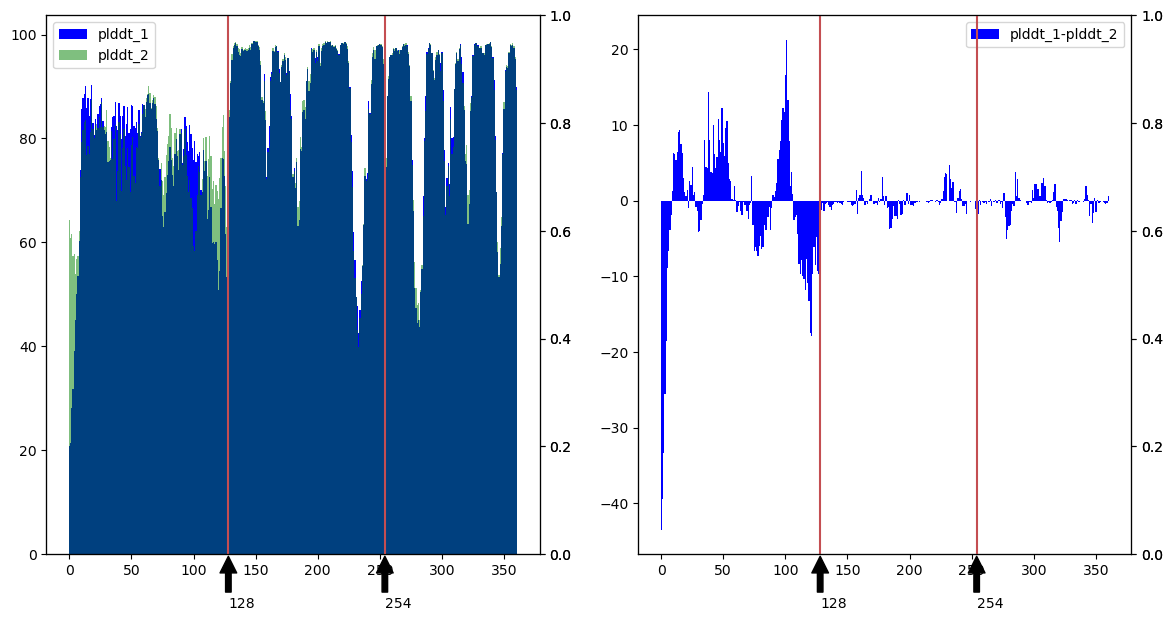

In [21]:
plot_vec(
    vec1=plddt_1,
    vec2=plddt_2,
    limits=get_chain_limits(asym_id_1),
    name1="plddt_1",
    name2="plddt_2"
)

# Norms

In [22]:
# Calculate norms


In [23]:



aligned_confidence_probs_diff = np.absolute(aligned_confidence_probs_1 - aligned_confidence_probs_2)
ptm_diff_acb = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_diff
        )
ptm1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1)
ptm2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2)
ptm_diff = ptm1 - ptm2
assert np.array_equal(asym_id_1,asym_id_2)
iptm_diff_acb = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=aligned_confidence_probs_diff, asym_id=asym_id_1,interface=True,
        )
iptm_diff = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=aligned_confidence_probs_1,asym_id=asym_id_1,interface=True,
        ) - confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=aligned_confidence_probs_2,asym_id=asym_id_2,interface=True,
        )
num_res=asym_id_1.shape[0]
interface_mask = np.ones(shape=(num_res, num_res), dtype=bool)
interface_mask *= asym_id_1[:, None] != asym_id_1[None, :]

In [24]:
asym_id_1[:, None] != asym_id_1[None, :]

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [25]:
print(f"{id} model={model} prediction{prediction}")
print(f"Norm aligned_confidence_probs: {np.linalg.norm(aligned_confidence_probs_1 - aligned_confidence_probs_2)/num_res} ")
print(f"Norm interface aligned_confidence_probs: {np.linalg.norm(aligned_confidence_probs_1*interface_mask[:,:,None] - aligned_confidence_probs_2*interface_mask[:,:,None])/num_res} ")
print(f"Norm ptm_terms_diff/num_res: {np.linalg.norm(predicted_tm_terms_1-predicted_tm_terms_2)/num_res}")
print(f"Norm pae_diff/num_res: {np.linalg.norm(pae1-pae2)/num_res}")
print(f"Norm interface pae_diff/num_res: {np.linalg.norm(pae1*interface_mask-pae2*interface_mask)/num_res}")
print(f"ptm_diff: {ptm_diff}")
print(f"ptm_diff_acb: {ptm_diff_acb}")
print(f"iptm_diff: {iptm_diff}")
print(f"iptm_diff_acb: {iptm_diff_acb}")

7x8t model=(1, 4) prediction(2, 29)
Norm aligned_confidence_probs: 0.11193961780157116 
Norm interface aligned_confidence_probs: 0.10368945261778263 
Norm ptm_terms_diff/num_res: 0.062025395885175416
Norm pae_diff/num_res: 2.558360937229484
Norm interface pae_diff/num_res: 2.2573277692715545
ptm_diff: 0.012181752796601275
ptm_diff_acb: 0.259804871368269
iptm_diff: 0.01597446453570639
iptm_diff_acb: 0.2055598713736164


In [26]:
ptm1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_1)
ptm2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs_2)
tptm1 = confidence_tools.calculate_predicted_tm_score(
            np.transpose(aligned_confidence_probs_1,(1,0,2)))
tptm2 = confidence_tools.calculate_predicted_tm_score(
            np.transpose(aligned_confidence_probs_2,(1,0,2)))

iptm1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=aligned_confidence_probs_1, asym_id=asym_id_1,interface=True,)
iptm2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=aligned_confidence_probs_2, asym_id=asym_id_2,interface=True,)
tiptm1 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=np.transpose(aligned_confidence_probs_1,(1,0,2)),asym_id=asym_id_1,interface=True,)
tiptm2 = confidence_tools.calculate_predicted_tm_score(
            aligned_confidence_probs=np.transpose(aligned_confidence_probs_2,(1,0,2)),asym_id=asym_id_2,interface=True,)

In [27]:
print(f"{ptm1} {ptm2} {tptm1} {tptm2}")
print(f"{iptm1} {iptm2} {tiptm1} {tiptm2}")

0.6874789851694412 0.6752972323728399 0.6031670992048637 0.5857400390087214
0.5678999560440202 0.5519254915083138 0.4937944399156446 0.46889414331409174


unrelaxed_model_2_multimer_baseline_86 bad DockQ, bad ranking
unrelaxed_model_5_multimer_baseline_56 bad DockQ, good ranking
unrelaxed_model_4_multimer_baseline_3 good DockQ, good ranking
unrelaxed_model_4_multimer_baseline_79 good DockQ, good ranking (same position as 3)

6e63_H_L_P_ab ('unrelaxed_model_5_multimer_baseline_56', 'unrelaxed_model_4_multimer_baseline_3')
Norm aligned_confidence_probs: 0.09952395895253056 
Norm interface aligned_confidence_probs: 0.07386507676995319 
Norm ptm_terms_diff/num_res: 0.10121440534807342
Norm pae_diff/num_res: 3.007536846658458
Norm interface pae_diff/num_res: 2.2519841401473335
ptm_diff: 0.00776759484691103
ptm_diff_acb: 0.6266805935114343
iptm_diff: 0.00776759484691103
iptm_diff_acb: 0.6266805935114343

6e63_H_L_P_ab ('unrelaxed_model_2_multimer_baseline_86', 'unrelaxed_model_5_multimer_baseline_56')
Norm aligned_confidence_probs: 0.24769022153771442 
Norm interface aligned_confidence_probs: 0.23589938619862433 
Norm ptm_terms_diff/num_res: 0.23991162954487014
Norm pae_diff/num_res: 8.127562813136889
Norm interface pae_diff/num_res: 7.810706097146739
ptm_diff: -0.14466622292774478
ptm_diff_acb: 0.508788795260116
iptm_diff: -0.14466622292774478
iptm_diff_acb: 0.508788795260116

6e63_H_L_P_ab ('unrelaxed_model_5_multimer_baseline_79', 'unrelaxed_model_4_multimer_baseline_3')
Norm aligned_confidence_probs: 0.05344495047693667 
Norm interface aligned_confidence_probs: 0.0401785451432933 
Norm ptm_terms_diff/num_res: 0.042115010331248426
Norm pae_diff/num_res: 1.2970380368440046
Norm interface pae_diff/num_res: 1.0937026479969854
ptm_diff: -0.0015190656278757375
ptm_diff_acb: 0.4737392396760566
iptm_diff: -0.0015190656278757375
iptm_diff_acb: 0.4737392396760566

# TODO

difference between coordinates (how similar are the models)
L2 norm
Ground truth

(use loss function: bin exact distances and compute error)


clustering: use foldseek (new version multi sequence)

cluster on l2 norm of pae difference

if two models are very similar, but one has a good ranking score and one a bad ranking score, can we say that both are bad? I.e. is the ranking score better at judging that a model is bad or good or neither?
(Are there cases where a good model gets a bad ranking score?)